https://ichi.pro/ko/twitter-neteuwokeuleul-daunlodeuhago-sigaghwahaneun-bangbeob-263925132103803

In [1]:
import tweepy
import pandas as pd

In [2]:
# 발급 완료된 키를 {your_key} 대신 입력합니다.
#CONSUMER_KEY = "ONbevzaPOVeJZUagpaPZo6orF"
#CONSUMER_SECRET = "MpFmU2eCEv7Af93AdHKeSwnyKzmBeoby52XNkktsAA9lm1yKPo"
#ACCESS_TOKEN_KEY = "1378619890186117122-26XKGWxcZeEflAT9IhE5AQYKZl9rhn"
#ACCESS_TOKEN_SECRET = "O8McOIhdyNXdeo2NQkZY7YLKgYw1V3RuZbMNBL7TuBuxK"
CONSUMER_KEY = "bhrYkqgzW9XqHFqQFYWZdeI6E"
CONSUMER_SECRET = "Qy7uPMtQORdjALH4RGzixzA2ND8n8Xe2481zYT6fhS2btCJaJ9"
ACCESS_TOKEN_KEY = "1378619890186117122-XB1zhm7M4QSCp5v1z0x8auQ3fan0iT"
ACCESS_TOKEN_SECRET = "WiK6wPCLJrH9p4P0lIHG3fPTqdY96Eejlclpa17xMlHUW"
# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

In [3]:
me = api.get_user(screen_name = 'kangaetti')
me.id

219962490

In [4]:
user_list = ["219962490"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

6


In [5]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 219962490 #Set my user ID as the source

In [6]:
df

,source,target
0,219962490,85988899
1,219962490,2758453262
2,219962490,1701526309
3,219962490,1448211264
4,219962490,16440882
5,219962490,1654849231


In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

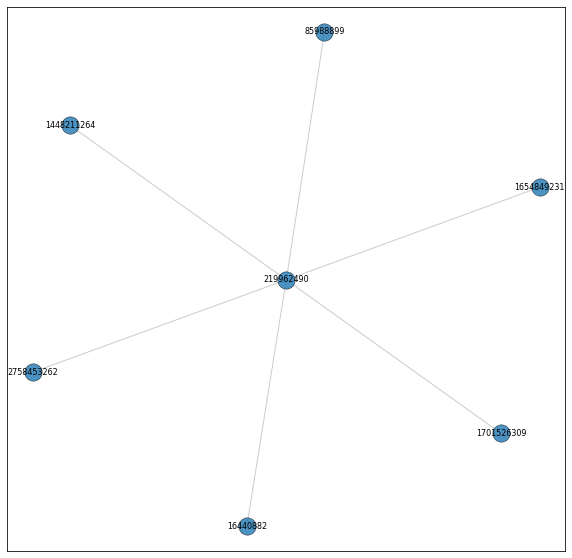

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [9]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

    # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv('networkOfFollowers.csv')

85988899
9
2758453262
7
1701526309
116
1448211264
595
16440882
5000
1654849231
4093


In [10]:
df = pd.read_csv('networkOfFollowers.csv') #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [11]:
G.number_of_nodes() #Find the total number of nodes in this graph

9817

In [12]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,16440882,5000
1,1654849231,4093
2,1448211264,596
3,1701526309,116
4,85988899,10


In [14]:
u = api.get_user(1654849231)
u.screen_name

'SeoulLifeline'